## 세종시 읍면동별 인구수 지도 표시 

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import folium 
from folium  import plugins  
import matplotlib as mpl 
import seaborn as sns
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

In [66]:
pop=pd.read_csv('22.세종시_연령별_인구현황.csv')
pop_2020=pop.set_index('읍면동').iloc[:,-312:]
pop_2020

,202001_남자(총_거주자_수),202001_남자(연령구간인구수),202001_남자(0~9세),202001_남자(10~19세),202001_남자(20~29세),202001_남자(30~39세),202001_남자(40~49세),202001_남자(50~59세),202001_남자(60~69세),202001_남자(70~79세),...,202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
읍면동,,,,,,,,,,,,,,,,,,,,,
세종특별자치시,170157,170157,24212,20256,18390,29905,33360,21905,13547,6111,...,21252,18385,31411,33519,21592,15113,7736,4672,915,22
조치원읍,22133,22133,1829,2182,3628,2946,3693,3478,2488,1304,...,2050,2811,2436,3186,3110,2676,1725,930,162,7
연기면,1430,1430,41,60,178,195,218,310,254,121,...,54,156,104,109,210,221,138,102,23,1
연동면,1608,1608,44,72,177,159,209,314,352,179,...,63,112,116,123,245,307,224,212,45,0
부강면,3417,3417,193,209,494,428,543,648,472,276,...,170,255,274,314,457,511,353,251,32,1
금남면,4544,4544,153,221,479,505,623,914,904,512,...,206,369,354,387,715,836,606,437,91,2
장군면,3474,3474,106,166,528,495,556,686,527,258,...,144,371,272,294,556,514,302,244,38,1
연서면,4014,4014,177,249,468,449,578,775,693,401,...,200,312,268,355,524,657,517,338,54,2
전의면,3023,3023,120,225,340,308,463,598,499,289,...,172,230,197,273,454,453,377,300,60,1


In [67]:
pop_2020_wom=pop_2020['202012_여자(총_거주자_수)'].reset_index()
pop_2020_wom=pop_2020_wom.set_index('읍면동')

pop_2020_man=pop_2020['202012_남자(총_거주자_수)'].reset_index()
pop_2020_man=pop_2020_man.set_index('읍면동')
pop_2020_man 

,202012_남자(총_거주자_수)
읍면동,
세종특별자치시,176998
조치원읍,22136
연기면,1512
연동면,1628
부강면,3412
금남면,4616
장군면,3785
연서면,4046
전의면,2979


In [68]:
pop_2020_man['202012 총거주자수']=pop_2020_wom['202012_여자(총_거주자_수)'] + pop_2020_man['202012_남자(총_거주자_수)']
pop_202012=pop_2020_man['202012 총거주자수'].reset_index() 
pop_202012.drop([0],inplace=True) 
pop_202012.sort_values(['202012 총거주자수'],ascending=False) 

,읍면동,202012 총거주자수
1,조치원읍,42789
13,도담동,39457
16,고운동,34387
17,소담동,32403
15,종촌동,29536
12,새롬동,29390
20,다정동,27313
14,아름동,23525
18,보람동,19386
11,한솔동,19208


In [69]:
geo_path = '32.세종시_행정경계(읍면동).geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))

center_lat=36.599920 
center_lon=127.298552

map = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = pop_202012,
               columns = ['읍면동','202012 총거주자수'],
               fill_color = 'Greens', #PuRd, YlGnBu
               key_on='feature.properties.ADM_DR_NM',
               legend_name='세종시 읍면동별 인구 분포(202012 기준)'
               )
map

#평단가격 및 거래횟수 top5 : 종촌동, 도담동, 고운동, 조치원읍, 새롬동
#읍면동 별 거주자수(202012 기준) : 조치원읍, 도담동, 고운동, 소담동, 종촌동
#  평단가격 및 거래횟수 top5랑 읍면동 순위 top5랑 비슷함  

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## 세종시 4구 및 조치원읍 아파트 브랜드 분포 

In [70]:
apt=pd.read_csv('3.세종시_아파트(매매)_실거래가.csv',thousands = ',') 
apt.astype({'전용면적(㎡)':float,'거래금액(만원)':int}) 
apt 

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,8600,7,2016,NaN
1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,27300,7,2014,NaN
2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN
3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,30500,20,2015,NaN
4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,31300,6,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23592,202012,31,세종특별자치시 조치원읍 신흥리,398,0,신흥대우푸르지오,126.6976,50000,10,2006,NaN
23593,202012,31,세종특별자치시 조치원읍 죽림리,396,0,조치원죽림자이,128.9491,44000,2,2008,NaN
23594,202012,31,세종특별자치시 종촌동,656,0,가재마을10단지,84.9365,73500,4,2014,NaN
23595,202012,31,세종특별자치시 종촌동,644,0,가재마을6단지,84.6799,60000,6,2016,NaN


In [71]:
## 평단가 
apt['평단가']=apt['거래금액(만원)']/apt['전용면적(㎡)']
apt 

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,평단가
0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,8600,7,2016,NaN,506.332095
1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,27300,7,2014,NaN,456.024535
2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN,376.517542
3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,30500,20,2015,NaN,358.907978
4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,31300,6,2014,NaN,368.547476
...,...,...,...,...,...,...,...,...,...,...,...,...
23592,202012,31,세종특별자치시 조치원읍 신흥리,398,0,신흥대우푸르지오,126.6976,50000,10,2006,NaN,394.640467
23593,202012,31,세종특별자치시 조치원읍 죽림리,396,0,조치원죽림자이,128.9491,44000,2,2008,NaN,341.219908
23594,202012,31,세종특별자치시 종촌동,656,0,가재마을10단지,84.9365,73500,4,2014,NaN,865.352351
23595,202012,31,세종특별자치시 종촌동,644,0,가재마을6단지,84.6799,60000,6,2016,NaN,708.550671


In [72]:
jong_apt=apt[apt['시군구']=='세종특별자치시 종촌동']
jong_apt=jong_apt.drop(['본번','부번','층','해제사유발생일'],axis=1)
jong_apt.sort_values(['전용면적(㎡)']) 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
7128,201809,12,세종특별자치시 종촌동,가재마을11단지,59.614,31000,2013,520.012078
20810,202008,6,세종특별자치시 종촌동,가재마을11단지,59.614,50000,2013,838.729158
15195,202002,3,세종특별자치시 종촌동,가재마을11단지,59.614,28000,2013,469.688328
2742,201707,15,세종특별자치시 종촌동,가재마을11단지,59.614,31200,2013,523.366994
14459,202001,12,세종특별자치시 종촌동,가재마을11단지,59.614,33000,2013,553.561244
...,...,...,...,...,...,...,...,...
1336,201705,11,세종특별자치시 종촌동,가재마을9단지,120.861,47500,2014,393.013462
13173,201912,15,세종특별자치시 종촌동,가재마을9단지,120.861,62000,2014,512.985992
3006,201707,29,세종특별자치시 종촌동,가재마을9단지,120.861,54100,2014,447.621648
17592,202005,30,세종특별자치시 종촌동,가재마을9단지,120.861,75900,2014,627.994142


In [73]:
do_apt=apt[apt['시군구']=='세종특별자치시 도담동']
do_apt=do_apt.drop(['본번','부번','층','해제사유발생일'],axis=1)
do_apt.sort_values(['전용면적(㎡)']) 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
21858,202011,3,세종특별자치시 도담동,라온프라이빗시티 Ⅱ,17.805,8000,2014,449.311991
16273,202003,10,세종특별자치시 도담동,라온프라이빗시티 Ⅰ,17.805,8400,2014,471.777591
15550,202002,14,세종특별자치시 도담동,라온프라이빗시티 Ⅰ,17.805,8800,2014,494.243190
18045,202006,12,세종특별자치시 도담동,라온프라이빗시티 Ⅱ,17.805,8270,2014,464.476271
16274,202003,10,세종특별자치시 도담동,라온프라이빗시티 Ⅰ,17.805,8400,2014,471.777591
...,...,...,...,...,...,...,...,...
11430,201911,19,세종특별자치시 도담동,도램마을 14단지(한림풀에버),111.996,70000,2015,625.022322
2857,201707,22,세종특별자치시 도담동,도램마을 14단지(한림풀에버),111.996,75000,2015,669.666774
612,201703,4,세종특별자치시 도담동,도램마을 14단지(한림풀에버),111.996,65800,2015,587.520983
11887,201911,30,세종특별자치시 도담동,도램마을 14단지(한림풀에버),111.996,83000,2015,741.097896


In [74]:
go_apt=apt[apt['시군구']=='세종특별자치시 고운동']  
go_apt=go_apt.drop(['본번','부번','층','해제사유발생일'],axis=1)
go_apt.sort_values(['전용면적(㎡)']) 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
18808,202006,24,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.4650,29000,2015,487.681830
6687,201807,15,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.4650,21900,2015,368.283864
15588,202002,15,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.4650,24000,2015,403.598756
21155,202008,24,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.4650,41000,2015,689.481207
15590,202002,15,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.4650,24500,2015,412.007063
...,...,...,...,...,...,...,...,...
16848,202004,24,세종특별자치시 고운동,가락마을14단지(우남퍼스트빌),120.6017,52500,2020,435.317247
20959,202008,12,세종특별자치시 고운동,가락마을18단지,123.0291,80000,2018,650.252664
9573,201907,10,세종특별자치시 고운동,가락마을 19단지,125.0123,74154,2019,593.173632
9346,201906,12,세종특별자치시 고운동,가락마을 19단지,125.0123,76500,2019,611.939785


In [75]:
sae_apt=apt[apt['시군구']=='세종특별자치시 새롬동']
sae_apt=sae_apt.drop(['본번','부번','층','해제사유발생일'],axis=1)
sae_apt.sort_values(['전용면적(㎡)']) 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
13395,201912,19,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),59.9079,47000,2017,784.537599
3806,201711,20,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),59.9079,28200,2017,470.722559
11380,201911,17,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),59.9079,41500,2017,692.730007
12426,201912,7,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),59.9079,44800,2017,747.814562
7710,201811,25,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),59.9079,42400,2017,707.753068
...,...,...,...,...,...,...,...,...
11004,201911,2,세종특별자치시 새롬동,새뜸마을6단지(메이저시티),120.5051,78000,2017,647.275510
16290,202003,11,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),125.0776,120000,2017,959.404402
20103,202007,25,세종특별자치시 새롬동,새뜸마을10단지(더샵힐스테이트),125.0776,140000,2017,1119.305135
16041,202002,27,세종특별자치시 새롬동,새뜸마을11단지(더샵힐스테이트),129.7782,119000,2017,916.949072


In [76]:
jo_apt=apt[apt.시군구.str.contains(r'(세종특별자치시 조치원읍)')]
jo_apt=jo_apt.drop(['본번','부번','층','해제사유발생일'],axis=1)
jo_apt.sort_values(['전용면적(㎡)']) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
10669,201910,14,세종특별자치시 조치원읍 원리,세종 스카이뷰,12.1799,6000,2015,492.614882
10593,201910,10,세종특별자치시 조치원읍 원리,세종 스카이뷰,12.1799,6000,2015,492.614882
10594,201910,10,세종특별자치시 조치원읍 원리,세종 스카이뷰,12.5154,6000,2015,479.409368
10671,201910,14,세종특별자치시 조치원읍 원리,세종 스카이뷰,12.5154,6000,2015,479.409368
10666,201910,14,세종특별자치시 조치원읍 원리,세종 스카이뷰,12.5154,6000,2015,479.409368
...,...,...,...,...,...,...,...,...
19768,202007,11,세종특별자치시 조치원읍 신흥리,조치원 신흥 e편한세상(아),176.3430,42000,2008,238.172198
16228,202003,7,세종특별자치시 조치원읍 신흥리,조치원 신흥 e편한세상(아),176.3430,37000,2008,209.818365
10820,201910,23,세종특별자치시 조치원읍 신흥리,조치원 신흥 e편한세상(아),176.3430,33800,2008,191.671912
3762,201711,12,세종특별자치시 조치원읍 신흥리,조치원 신흥 e편한세상(아),176.3430,35000,2008,198.476832


In [77]:
jo_apt['시군구']=jo_apt['시군구'].str.replace('세종특별자치시 조치원읍.*','세종특별자치시 조치원읍')
jo_apt 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
7,201701,2,세종특별자치시 조치원읍,세종e편한세상,84.7067,19000,2013,224.303390
8,201701,2,세종특별자치시 조치원읍,신흥대우푸르지오,84.9228,13000,2006,153.080209
9,201701,2,세종특별자치시 조치원읍,조치원죽림자이,128.9491,22500,2008,174.487453
10,201701,2,세종특별자치시 조치원읍,조치원죽림자이,84.6682,19850,2008,234.444573
14,201701,4,세종특별자치시 조치원읍,세종e편한세상,99.6514,21400,2013,214.748614
...,...,...,...,...,...,...,...,...
23562,202012,29,세종특별자치시 조치원읍,죽림대우푸르지오,104.9044,42700,2007,407.037264
23578,202012,30,세종특별자치시 조치원읍,조치원죽림자이,128.9491,50000,2008,387.749895
23591,202012,31,세종특별자치시 조치원읍,세종e편한세상,101.6828,34500,2013,339.290421
23592,202012,31,세종특별자치시 조치원읍,신흥대우푸르지오,126.6976,50000,2006,394.640467


### 소형/중소형/중형/대형으로 나누기 
- 소형은 전용 60㎡이하, 중소형은 전용 60~85㎡이하, 중소형은 전용 85~135㎡이하,대형은 전용이 135㎡이상으로 분류하시면 되겠습니다. 감사합니다.

#### 도담동 

In [78]:
#소형, 중소형, 중형, 대형 
min_do=do_apt[do_apt['전용면적(㎡)']<60]
minmid_do=do_apt[ (60<=do_apt['전용면적(㎡)'])& (do_apt['전용면적(㎡)']<85)]
mid_do=do_apt[ (85<=do_apt['전용면적(㎡)'])& (do_apt['전용면적(㎡)']<135)]
large_do=do_apt[ do_apt['전용면적(㎡)']>=135]
large_do

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
1512,201705,22,세종특별자치시 도담동,도램마을 14단지(한림풀에버),148.104,120000,2015,810.241452


#### 종촌동 

In [79]:
#소형, 중소형, 중형, 대형 
min_jong=jong_apt[jong_apt['전용면적(㎡)']<60]
minmid_jong=jong_apt[ (60<=jong_apt['전용면적(㎡)'])& (jong_apt['전용면적(㎡)']<85)]
mid_jong=jong_apt[ (85<=jong_apt['전용면적(㎡)'])& (jong_apt['전용면적(㎡)']<135)]
large_jong=jong_apt[ jong_apt['전용면적(㎡)']>=135]
large_jong 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가


In [80]:
minmid_jong

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
41,201701,7,세종특별자치시 종촌동,가재마을7단지,84.9940,36500,2014,429.442078
42,201701,7,세종특별자치시 종촌동,가재마을12단지,84.9941,37000,2015,435.324334
45,201701,8,세종특별자치시 종촌동,가재마을 5단지,84.9424,36000,2014,423.816610
56,201701,9,세종특별자치시 종촌동,가재마을12단지,84.9941,36500,2015,429.441573
57,201701,9,세종특별자치시 종촌동,가재마을 5단지,84.9424,32400,2014,381.434949
...,...,...,...,...,...,...,...,...
23364,202012,26,세종특별자치시 종촌동,가재마을 5단지,84.9424,78000,2014,918.269321
23367,202012,26,세종특별자치시 종촌동,가재마을4단지(센트레빌),74.9800,60000,2015,800.213390
23579,202012,30,세종특별자치시 종촌동,가재마을4단지(센트레빌),74.9800,58500,2015,780.208055
23594,202012,31,세종특별자치시 종촌동,가재마을10단지,84.9365,73500,2014,865.352351


#### 고운동 

In [81]:
#소형, 중소형, 중형, 대형 
min_go=go_apt[go_apt['전용면적(㎡)']<60]
minmid_go=go_apt[ (60<=go_apt['전용면적(㎡)'])& (go_apt['전용면적(㎡)']<85)]
mid_go=go_apt[ (85<=go_apt['전용면적(㎡)'])& (go_apt['전용면적(㎡)']<135)]
large_go=go_apt[go_apt['전용면적(㎡)']>=135]
large_go 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
9278,201906,2,세종특별자치시 고운동,가락마을 2단지,209.1852,73000,2019,348.973063


In [82]:
min_go 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
46,201701,9,세종특별자치시 고운동,가락마을17단지(골드클래스),59.9159,25100,2015,418.920520
118,201701,16,세종특별자치시 고운동,가락마을3단지(호반베르디움),59.8652,23500,2014,392.548593
151,201701,19,세종특별자치시 고운동,가락마을13단지(대광로제비앙),59.6550,23000,2015,385.550247
166,201701,21,세종특별자치시 고운동,가락마을3단지(호반베르디움),59.8652,25000,2014,417.604886
187,201701,23,세종특별자치시 고운동,가락마을9단지(신동아 파밀리에),59.9940,23600,2015,393.372671
...,...,...,...,...,...,...,...,...
23193,202012,19,세종특별자치시 고운동,이지더원(가락마을4단지),59.9853,47500,2014,791.860673
23315,202012,24,세종특별자치시 고운동,가락마을17단지(골드클래스),59.9159,52300,2015,872.890168
23328,202012,25,세종특별자치시 고운동,가락마을6단지(중흥S클래스프라디움),59.6866,48200,2015,807.551444
23340,202012,26,세종특별자치시 고운동,가락마을5단지(유승한내들),59.9058,51000,2015,851.336598


#### 새롬동 

In [83]:
#소형, 중소형, 중형, 대형 
min_sae=sae_apt[sae_apt['전용면적(㎡)']<60]
minmid_sae=sae_apt[ (60<=sae_apt['전용면적(㎡)'])& (sae_apt['전용면적(㎡)']<85)]
mid_sae=sae_apt[ (85<=sae_apt['전용면적(㎡)'])& (sae_apt['전용면적(㎡)']<135)]
large_sae =sae_apt[sae_apt['전용면적(㎡)']>=135]
large_sae 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가


In [84]:
minmid_sae 

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
3258,201708,25,세종특별자치시 새롬동,새뜸마을11단지(더샵힐스테이트),84.9735,51900,2017,610.778655
3274,201708,28,세종특별자치시 새롬동,새뜸마을11단지(더샵힐스테이트),84.9032,48000,2017,565.349716
3471,201709,26,세종특별자치시 새롬동,새뜸마을3단지(캐슬&파밀리에),84.9518,43000,2017,506.169381
4820,201801,20,세종특별자치시 새롬동,새뜸마을11단지(더샵힐스테이트),84.9032,52500,2017,618.351252
4890,201801,27,세종특별자치시 새롬동,새뜸마을12단지(금성백조예미지),84.9738,51000,2017,600.184998
...,...,...,...,...,...,...,...,...
23305,202012,23,세종특별자치시 새롬동,새뜸마을12단지(금성백조예미지),74.7054,93000,2017,1244.889928
23352,202012,26,세종특별자치시 새롬동,새뜸마을1단지(메이저시티),84.8892,83000,2017,977.745108
23354,202012,26,세종특별자치시 새롬동,새뜸마을3단지(캐슬&파밀리에),74.9980,88000,2017,1173.364623
23403,202012,29,세종특별자치시 새롬동,새뜸마을5단지(메이저시티),84.8892,103000,2017,1213.346339


#### 조치원 

In [85]:
#소형, 중소형, 중형, 대형 
min_jo=jo_apt[jo_apt['전용면적(㎡)']<60]
minmid_jo=jo_apt[ (60<=jo_apt['전용면적(㎡)'])& (jo_apt['전용면적(㎡)']<85)]
mid_jo=jo_apt[ (85<=jo_apt['전용면적(㎡)'])& (jo_apt['전용면적(㎡)']<135)]
large_jo =jo_apt[jo_apt['전용면적(㎡)']>=135]
large_jo  

,계약년월,계약일,시군구,단지명,전용면적(㎡),거래금액(만원),건축년도,평단가
183,201701,22,세종특별자치시 조치원읍,조치원 신흥 e편한세상(아),151.6590,28000,2008,184.624717
251,201702,1,세종특별자치시 조치원읍,신흥대우푸르지오,144.2557,26680,2006,184.949364
289,201702,4,세종특별자치시 조치원읍,신흥대우푸르지오,144.2557,24000,2006,166.371242
509,201702,24,세종특별자치시 조치원읍,조치원죽림자이,154.5474,28000,2008,181.174190
697,201703,11,세종특별자치시 조치원읍,신흥대우푸르지오,144.2557,24000,2006,166.371242
...,...,...,...,...,...,...,...,...
21256,202008,31,세종특별자치시 조치원읍,세종e편한세상,152.7850,26000,2013,170.173774
21807,202010,27,세종특별자치시 조치원읍,조치원 신흥 e편한세상(아),176.3430,50000,2008,283.538332
22197,202011,21,세종특별자치시 조치원읍,신흥대우푸르지오,144.2557,45000,2006,311.946079
22465,202012,1,세종특별자치시 조치원읍,신흥대우푸르지오,144.2557,39600,2006,274.512550


#### 소형 

In [86]:
MIN1=pd.concat([min_go, min_sae, min_do, min_jong,min_jo])
MIN1['거래량']=1
MIN2=MIN1[['시군구','단지명','평단가','거래량']].groupby(['시군구','단지명']).sum().reset_index()
MIN2['평단가']= MIN2['평단가']/MIN2['거래량']
MIN2.head() 

,시군구,단지명,평단가,거래량
0,세종특별자치시 고운동,가락마을 19단지,574.109900,17
1,세종특별자치시 고운동,가락마을 20단지(호반베르디움5차),486.632177,54
2,세종특별자치시 고운동,가락마을11단지(중흥에듀카운티),458.441647,85
3,세종특별자치시 고운동,가락마을13단지(대광로제비앙),458.264784,85
4,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),480.050067,51


In [87]:
MIN3=MIN1[['시군구','단지명','건축년도']].groupby(['시군구','단지명']).mean().reset_index()
MIN3.head()

,시군구,단지명,건축년도
0,세종특별자치시 고운동,가락마을 19단지,2019
1,세종특별자치시 고운동,가락마을 20단지(호반베르디움5차),2015
2,세종특별자치시 고운동,가락마을11단지(중흥에듀카운티),2016
3,세종특별자치시 고운동,가락마을13단지(대광로제비앙),2015
4,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),2015


In [88]:
MIN4=pd.merge(MIN2, MIN3,how='left') 
MIN4.sort_values(['거래량'])

,시군구,단지명,평단가,거래량,건축년도
38,세종특별자치시 조치원읍,풍산,186.610879,3,1998
32,세종특별자치시 조치원읍,세종3차 굿애플,375.305676,5,2014
0,세종특별자치시 고운동,가락마을 19단지,574.109900,17,2019
28,세종특별자치시 조치원읍,목화,166.797604,17,1994
31,세종특별자치시 조치원읍,세종 스카이뷰,460.902146,17,2015
25,세종특별자치시 조치원읍,계룡,173.321169,24,1989
30,세종특별자치시 조치원읍,삼일,159.291010,26,1994
12,세종특별자치시 도담동,까사리움,439.021546,29,2015
27,세종특별자치시 조치원읍,두진한라,104.189586,32,1991
26,세종특별자치시 조치원읍,도화,132.148947,38,1996


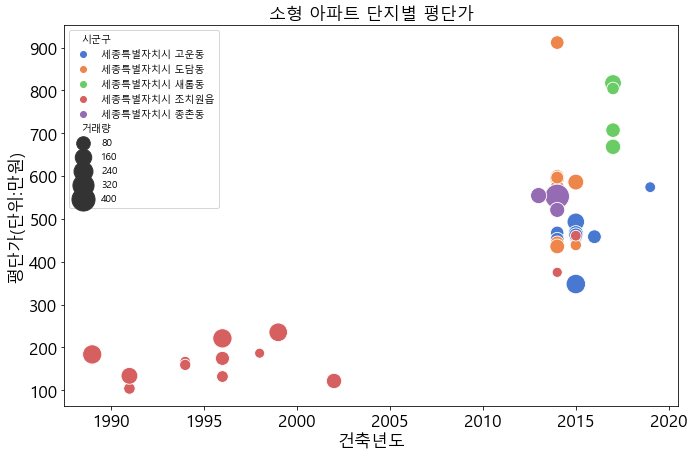

In [120]:
plt.figure(figsize=(11,7)) 
sns.scatterplot(x='건축년도', 
                y='평단가', 
                hue='시군구',
                size='거래량',sizes=(100,600), palette="muted", 
                data=MIN4) 
plt.title('소형 아파트 단지별 평단가', fontsize=17)
plt.xlabel('건축년도', fontsize=17)
plt.ylabel('평단가(단위:만원)', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()  

#### 중소형  

In [90]:
MINMID1=pd.concat([minmid_go, minmid_sae, minmid_do, minmid_jong,minmid_jo])
MINMID1['거래량']=1
MINMID2=MINMID1[['시군구','단지명','평단가','거래량']].groupby(['시군구','단지명']).sum().reset_index()
MINMID2['평단가']= MINMID2['평단가']/MINMID2['거래량']
MINMID2.head() 

,시군구,단지명,평단가,거래량
0,세종특별자치시 고운동,가락마을 19단지,549.644886,30
1,세종특별자치시 고운동,가락마을 20단지(호반베르디움5차),457.894401,111
2,세종특별자치시 고운동,가락마을11단지(중흥에듀카운티),441.902525,62
3,세종특별자치시 고운동,가락마을13단지(대광로제비앙),397.755777,99
4,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),435.350659,55


In [91]:
MINMID3=MINMID1[['시군구','단지명','건축년도']].groupby(['시군구','단지명']).mean().reset_index()
MINMID3.head()

,시군구,단지명,건축년도
0,세종특별자치시 고운동,가락마을 19단지,2019
1,세종특별자치시 고운동,가락마을 20단지(호반베르디움5차),2015
2,세종특별자치시 고운동,가락마을11단지(중흥에듀카운티),2016
3,세종특별자치시 고운동,가락마을13단지(대광로제비앙),2015
4,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),2015


In [92]:
MINMID4=pd.merge(MINMID2, MINMID3,how='left') 
MINMID4.sort_values(['거래량']) 

,시군구,단지명,평단가,거래량,건축년도
37,세종특별자치시 조치원읍,대도,71.001495,2,1980
62,세종특별자치시 종촌동,가재마을8단지,457.605642,2,2015
60,세종특별자치시 종촌동,가재마을6단지,551.882245,3,2016
28,세종특별자치시 새롬동,새뜸마을13단지,886.354670,5,2019
38,세종특별자치시 조치원읍,목화,135.978338,6,1994
...,...,...,...,...,...
24,세종특별자치시 도담동,현대힐스테이트(도램마을15단지),620.092804,257,2014
11,세종특별자치시 고운동,가락마을8단지(고운뜰아파트),406.135288,300,2015
56,세종특별자치시 종촌동,가재마을12단지,533.368010,314,2015
48,세종특별자치시 조치원읍,조치원죽림자이,255.159487,549,2008


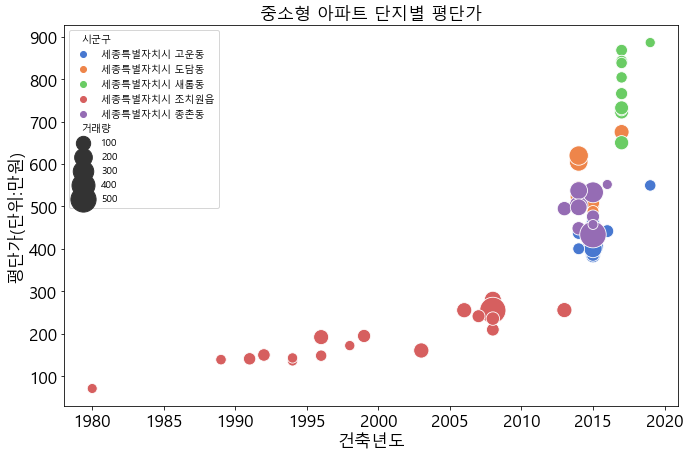

In [117]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='건축년도', 
                y='평단가', 
                hue='시군구',
                size='거래량',sizes=(100,700), palette="muted", 
                data=MINMID4)
plt.title('중소형 아파트 단지별 평단가', fontsize=17)
plt.xlabel('건축년도', fontsize=17)
plt.ylabel('평단가(단위:만원)', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17) 
plt.show()  

#### 중형 

In [94]:
MID1=pd.concat([mid_go, mid_sae, mid_do, mid_jong,min_jo])
MID1['거래량']=1
MID2=MID1[['시군구','단지명','평단가','거래량']].groupby(['시군구','단지명']).sum().reset_index()
MID2['평단가']= MID2['평단가']/MID2['거래량']
MID2.head() 

,시군구,단지명,평단가,거래량
0,세종특별자치시 고운동,가락마을 19단지,509.551134,21
1,세종특별자치시 고운동,가락마을 2단지,530.065681,23
2,세종특별자치시 고운동,가락마을14단지(우남퍼스트빌),491.849373,14
3,세종특별자치시 고운동,가락마을18단지,563.954247,55
4,세종특별자치시 고운동,가락마을1단지(힐데스하임),566.716186,35


In [95]:
MID3=MID1[['시군구','단지명','건축년도']].groupby(['시군구','단지명']).mean().reset_index()
MID3.head()

,시군구,단지명,건축년도
0,세종특별자치시 고운동,가락마을 19단지,2019
1,세종특별자치시 고운동,가락마을 2단지,2019
2,세종특별자치시 고운동,가락마을14단지(우남퍼스트빌),2020
3,세종특별자치시 고운동,가락마을18단지,2018
4,세종특별자치시 고운동,가락마을1단지(힐데스하임),2018


In [96]:
MID4=pd.merge(MID2, MID3,how='left') 
MID4.sort_values(['거래량']) 

,시군구,단지명,평단가,거래량,건축년도
37,세종특별자치시 조치원읍,풍산,186.610879,3,1998
31,세종특별자치시 조치원읍,세종3차 굿애플,375.305676,5,2014
12,세종특별자치시 도담동,도램마을18단지(모아미래도),512.219690,7,2015
11,세종특별자치시 도담동,도램마을17단지(모아미래도),458.781362,9,2015
9,세종특별자치시 도담동,도램마을 19단지(모아미래도),427.114067,10,2015
10,세종특별자치시 도담동,도램마을16단지(모아미래도),528.747572,13,2015
2,세종특별자치시 고운동,가락마을14단지(우남퍼스트빌),491.849373,14,2020
30,세종특별자치시 조치원읍,세종 스카이뷰,460.902146,17,2015
27,세종특별자치시 조치원읍,목화,166.797604,17,1994
0,세종특별자치시 고운동,가락마을 19단지,509.551134,21,2019


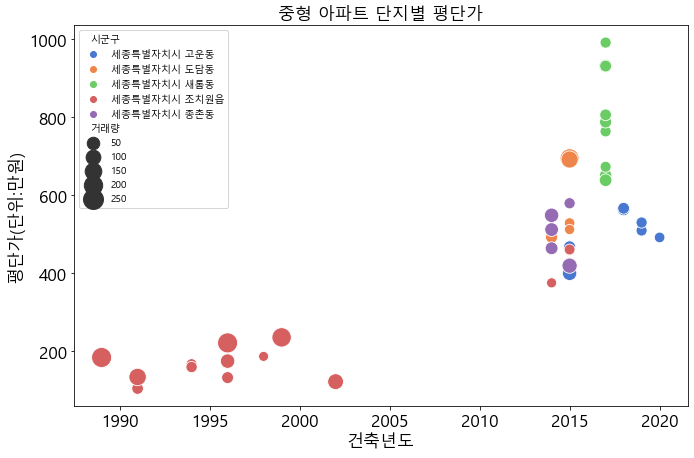

In [118]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='건축년도', 
                y='평단가', 
                hue='시군구',
                size='거래량',sizes=(100,400), palette="muted", 
                data=MID4)
plt.title('중형 아파트 단지별 평단가', fontsize=17)
plt.xlabel('건축년도', fontsize=17)
plt.ylabel('평단가(단위:만원)', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()  

#### 대형 

In [98]:
LARGE1=pd.concat([large_go, large_sae, large_do, large_jo,large_jong])
LARGE1['거래량']=1
LARGE2=LARGE1[['시군구','단지명','평단가','거래량']].groupby(['시군구','단지명']).sum().reset_index()
LARGE2['평단가']= LARGE2['평단가']/LARGE2['거래량']
LARGE2.head()  

,시군구,단지명,평단가,거래량
0,세종특별자치시 고운동,가락마을 2단지,348.973063,1
1,세종특별자치시 도담동,도램마을 14단지(한림풀에버),810.241452,1
2,세종특별자치시 조치원읍,세종e편한세상,177.072357,50
3,세종특별자치시 조치원읍,신흥대우푸르지오,207.217273,22
4,세종특별자치시 조치원읍,조치원 신흥 e편한세상(아),211.696011,46


In [99]:
LARGE3=LARGE1[['시군구','단지명','건축년도']].groupby(['시군구','단지명']).mean().reset_index()
LARGE3.head()

,시군구,단지명,건축년도
0,세종특별자치시 고운동,가락마을 2단지,2019
1,세종특별자치시 도담동,도램마을 14단지(한림풀에버),2015
2,세종특별자치시 조치원읍,세종e편한세상,2013
3,세종특별자치시 조치원읍,신흥대우푸르지오,2006
4,세종특별자치시 조치원읍,조치원 신흥 e편한세상(아),2008


In [100]:
LARGE4=pd.merge(LARGE2, LARGE3,how='left') 
LARGE4.sort_values(['거래량']) 

,시군구,단지명,평단가,거래량,건축년도
0,세종특별자치시 고운동,가락마을 2단지,348.973063,1,2019
1,세종특별자치시 도담동,도램마을 14단지(한림풀에버),810.241452,1,2015
5,세종특별자치시 조치원읍,조치원신동아파밀리에,199.393234,4,2008
6,세종특별자치시 조치원읍,조치원죽림자이,194.402782,9,2008
3,세종특별자치시 조치원읍,신흥대우푸르지오,207.217273,22,2006
4,세종특별자치시 조치원읍,조치원 신흥 e편한세상(아),211.696011,46,2008
2,세종특별자치시 조치원읍,세종e편한세상,177.072357,50,2013


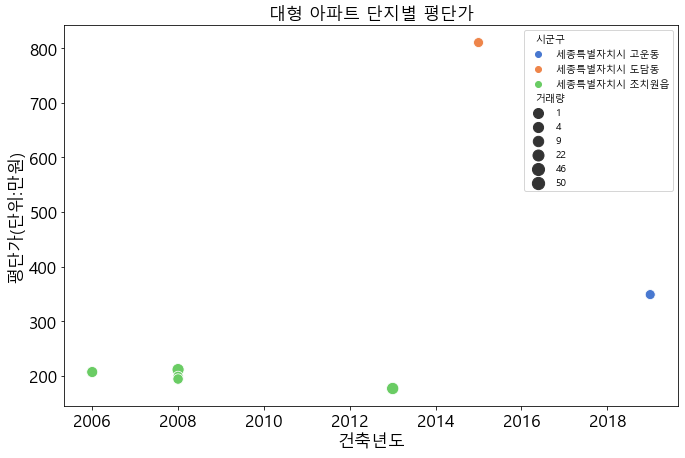

In [119]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='건축년도', 
                y='평단가', 
                hue='시군구',
                size='거래량',sizes=(100,150), palette="muted", 
                data=LARGE4) 
plt.title('대형 아파트 단지별 평단가', fontsize=17)
plt.xlabel('건축년도', fontsize=17)
plt.ylabel('평단가(단위:만원)', fontsize=17)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)
plt.show() 